<a href="https://colab.research.google.com/github/EndangSupriyadi/GCI_GLOBAL_2025/blob/master/lec6_2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-2 Model Evaluation and Performance Tuning

Goal: Understand methods for evaluating the generalization performance of machine learning models and approaches to improving their performance.

To ensure a machine learning model not only performs well on the seen data but also generalizes effectively to unseen data, it is crucial to evaluate its performance using data that was not used during training.

In this chatper, we will cover the **holdout method** and **cross-validation** techniques, specifically **k-fold cross-validation** and **leave-one-out cross-validation**.

Additionally, we will explore techniques for improving generalization performance, including **feature engineering**, **dimensionality reduction**, and **hyperparameter tuning**.

- **5-2.1 Holdout Method and Cross-Validation**
    - 5-2.1.1 Holdout Method
    - 5-2.1.2 Cross-Validation

- **5-2.2 Performance Tuning: Hyperparameter Optimization**
    - 5-2.2.1 Hyperparameters
    - 5-2.2.2 Grid Search

## 5-2.1 Holdout Method and Cross-Validation

Keywords: Overfitting, Holdout Method, Cross-Validation, k-Fold Cross-Validation

### 5-2.1.1 Holdout Method

The **holdout method** involves randomly splitting the dataset into two subsets: **train data** and **test data**. The model is trained using the training data and then evaluated on the unseen test data.

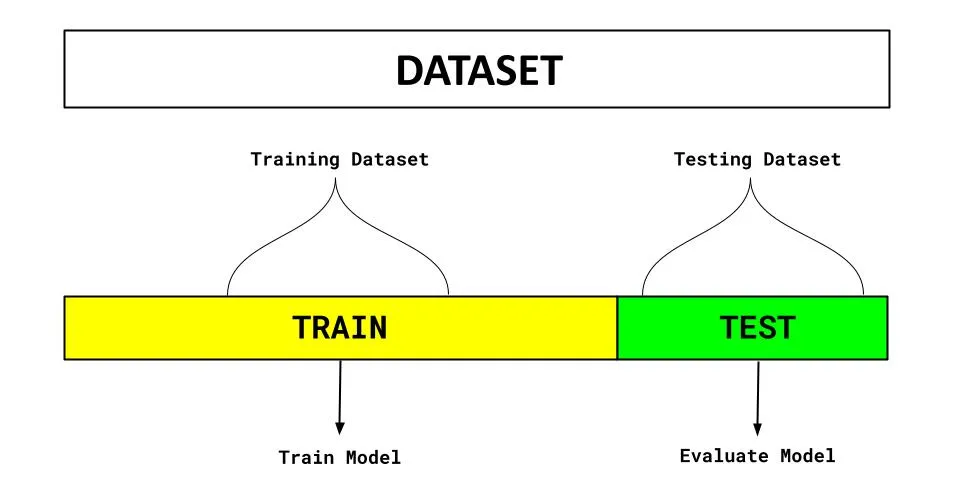

Reference: https://heartbeat.comet.ml/understanding-hold-out-methods-for-training-machine-learning-models-733f5179d716


This method is simple and effective when working with large datasets. However, when data is limited, it can lead to two key issues:

1. The evaluation can be highly dependent on how the test data is randomly split, leading to inconsistent results.
2. Since the dataset is divided into training and test sets, the amount of training data is reduced.

### 5-2.1.2 Cross-Validation

To address the challenges of holdout method, **cross-validation** was introduced. This approach reuses data for both training and validation to ensure a more reliable evaluation.

One common cross-validation technique is **k-fold cross-validation**. In this method, the dataset is randomly split into $k$ equal blocks (folds). One of the $k$ folds is used as the validation set, while the remaining $k-1$ folds are used for training. This process is repeated $k$ times.

The concept of k-fold cross-validation is illustrated below, using $k = 5$ as an example. The dataset is randomly divided into 5 folds. In each iteration, 4 folds are used for training, while the remaining one is used for validation. This process is repeated 5 times, ensuring that each group serves as the validation set once.

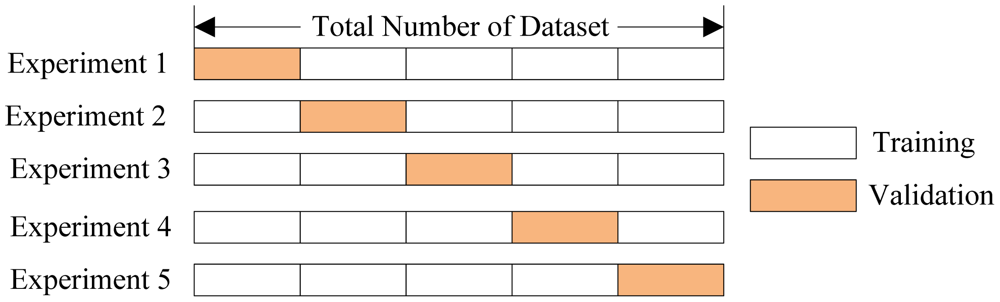

Reference: https://i.stack.imgur.com/1fXzJ.png

k-fold cross-validation is superior to the holdout method in two key ways:

1. It uses $k$ different validation sets, which reduces the risk of evaluation scores being artificially high due to a specific validation set.
2. Since the process is repeated $k$ times, all available data is used for training.

A special case of k-fold cross-validation is **leave-one-out**. In this method, k is equal to the number of data points. Like k-fold, one data point is used as the validation set, and the rest are used for training. This method is especially useful when you have a very small dataset.

#### Example of k-fold Cross Validation

Let’s apply k-fold cross-validation using a decision tree algorithm on a breast cancer dataset. You can use the `cross_val_score` function from the `sklearn.model_selection` module to get the results. The parameters for this function are:

1. Algorithm: We’ll use a decision tree with 'entropy' as the splitting criterion.
2. Features
3. Target variable
4. Number of folds ($k$): We’ll set cv=5 for 5-fold cross-validation.

The first line of the result shows the evaluation scores for each fold (5 total in this case). We then average these scores to provide an overall assessment of the model’s performance.

Typically, the model with the highest average score is selected. However, if the standard deviation is large, you may want to choose the model based on the score obtained by subtracting the standard deviation from the average score.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load breast cancer dataset
cancer = load_breast_cancer()

# Initialize Decision Tree model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Perform 5-fold cross-validation
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# Display results
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

#### <Practice Question 1>

Use a different model (e.g., logistic regression) instead of a decision tree and evaluate its performance using k-fold cross-validation.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

# Import a different model class (e.g., logistic regression)
## WRITE ME

# Load dataset
cancer = load_breast_cancer()

# Initialize model
## WRITE ME

# Perform k-fold cross-validation
## WRITE ME

# Display results
## WRITE ME

## 5-2.2 Performance Tuning: Hyperparameter Optimization

Keywords: Hyperparameters, SVC, Grid Search, Random Search, Hyperopt

This section explains methods to improve a model's generalization performance, specifically focusing on tuning hyperparameters.

### 5-2.2.1 Hyperparameters

A **hyperparameter** is a configuration variable that controls how a model learns. Hyperparameters are set before training begins, and are different from parameters that are learned during training.

Each algorithm has its own hyperparameters. For example, in a decision tree, a hyperparameter would be the depth of the tree, and in ridge regression, it would be the strength of regularization.

To improve model generalization, we need to tune the preset **hyperparameters**. One common tuning method, **grid search**, involves testing all possible combinations of hyperparameters with cross-validation to find the combination that gives the best performance.

### 5-2.2.2 Grid Search

While Scikit-learn includes a handy built-in classes for grid search, let's first understand the core concept without using these classes.

In this example, we'll use grid search to find the optimal parameters for a Support Vector Machine (SVM). SVMs have two key hyperparameters: gamma and C. We'll vary these parameters and evaluate the performance of each resulting model.

The program below uses `np.logspace(-3, 2, num=6)` to create a test range. This generates an array of values from $10^-3$ to $10^2$, divided into 6 parts on a logarithmic scale: `[0.001, 0.01, 0.1, 1, 10, 100]`. The program will try every combination of gamma and C values from this array. We use the holdout method to evaluate each model.

When executed, the program will display:
1. The best score achieved
2. The optimal gamma and C values that produced this score
3. A heatmap showing scores for different parameter combinations

In [ ]:
# Import
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load breast cancer data
cancer = load_breast_cancer()

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Build and evaluate models for all combinations of hyperparameters
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# Store evaluation results in scores
scores = pd.Series(scores)

# Display
print('Best score: {:.2f}'.format(scores.max()))
print('Parameters (gamma, C) for the best score: {}'.format(scores.idxmax()))

# Display heatmap. Gamma on the vertical axis, C on the horizontal axis
sns.heatmap(scores.unstack())

From this result, we can see that the best score achieved was 0.91, obtained when using the parameters gamma = 0.001 and C = 1.0.

#### Using GridSearchCV for Grid Search

Now that we understand how grid search works, let's look at how to perform the same task using the `GridSearchCV` class from the `sklearn.model_selection` module. Here's how it works:
The initial step of splitting the data remains the same. The key difference is that we now use the `fit` method of the `GridSearchCV` class. This approach not only evaluates the model for different hyperparameter combinations but also automatically saves the best-performing model. You can access the optimal parameters and evaluation results through the class attributes.

Note that the model evaluation performed during the `GridSearchCV` class's `fit` method uses (an improved version of) k-fold cross-validation by default. This is why `GridSearchCV` has an initialization parameter `cv` - in this case, we set it to `cv=5`.

In [ ]:
# Import
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load the breast cancer data
cancer = load_breast_cancer()

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Prepare parameters for GridSearchCV
param_grid = {
    'C': np.logspace(-3, 2, num=6),
    'gamma': np.logspace(-3, 2, num=6)
}

# Initialize GridSearchCV
gs = GridSearchCV(
    estimator=SVC(),        # The machine learning algorithm to use
    param_grid=param_grid,  # The range of hyperparameters to search
    cv=5                    # Number of splits for cross-validation
)

# Perform hyperparameter tuning and build the best model
gs.fit(X_train, y_train)

# Display results
print('Best cross-validation score: {:.3f}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))
print('Test set score: {:.3f}'.format(gs.score(X_test, y_test)))


Looking at the three lines of output, we can see:
1. The evaluation score (0.93) found through grid search
2. The combination of hyperparameters that achieved this score
3. The evaluation score on the test data (0.909)

The evaluation score found through grid search represents the score obtained through k-fold cross-validation on the training data. Since this score is close to that of the test data, we can conclude that there is no overfitting in our model.

Scikit-learn offers random search as an alternative to grid search. For more information, you can refer to the `RandomizedSearchCV` class in the `sklearn.model_selection` module. Additionally, there are more sophisticated parameter search approaches available, such as Bayesian optimization (like Hyperopt).

#### <Practice Question 2>

Perform grid search and cross-validation on the breast cancer dataset using a decision tree. For the decision tree parameters, set the tree depth and minimum number of samples per leaf as follows: `param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [2, 3, 4, 5]}`

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
## WRITE ME

# Split into training and test data
## WRITE ME

# Prepare parameters for GridSearchCV
## WRITE ME

# Perform hyperparameter tuning and build the best model
## WRITE ME

# Display results
## WRITE ME